# About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

#Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

#Dataset

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("https://gist.github.com/singhsidhukuldeep/564f271315abb6bc22647e81e6bf4762/raw/66fb67a8bb014df6b7f924aad0a91aa662bc7fc2/netflix_titles.csv")

**BASIC PRELIM. ANALYSIS**

In [ ]:
# I have used the following dataframes for my analysis:
'''
    1) director: Director Name(s): df_director (to un-nest director)
    2) cast: Actor Name(s): df_cast (to un-nest actors)
    3) country: Country name(s): df_country (to un-nest countries)
    4) listed_in: genres: df_genre (to unnest genres)
    5) ******: time analysis: df_t (Split 'duration' into an integer & {min/Season/Seasons} & also break 'date_added' to year_added, month_added etc.)
'''
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
#Check for duplicates
df.duplicated().any()

False

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#The Data-Set contains 8807 rows and 12 columns
df.shape

(8807, 12)

In [ ]:
#The datatype of 12 columns in the Data-Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df['country'].value_counts().head(15)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: country, dtype: int64

In [ ]:
df['date_added'].value_counts().head(10)

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
October 1, 2019       60
July 1, 2021          60
November 1, 2018      60
September 1, 2021     56
July 1, 2019          52
Name: date_added, dtype: int64

In [ ]:
df['release_year'].value_counts().head(15)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# NULL Values

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Preparation

In [ ]:
df['rating'].value_counts().index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object')

In [ ]:
top_rating = df['rating'].value_counts().index[0]
top_rating

'TV-MA'

In [ ]:
df['duration'].value_counts().index

Index(['1 Season', '2 Seasons', '3 Seasons', '90 min', '94 min', '97 min',
       '93 min', '91 min', '95 min', '96 min',
       ...
       '230 min', '253 min', '273 min', '208 min', '5 min', '16 min',
       '186 min', '193 min', '189 min', '191 min'],
      dtype='object', length=220)

In [ ]:
df[df['rating'] == '74 min']
df.loc[5541, 'duration'] = df.loc[5541, 'rating']
df.loc[5541, 'rating'] = top_rating
df.loc[[5541]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
df[df['rating'] == '84 min']
df.loc[5794, 'duration'] = df.loc[5794, 'rating']
df.loc[5794, 'rating'] = top_rating
df.loc[[5794]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,TV-MA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [ ]:
df[df['rating'] == '66 min']
df.loc[5813, 'duration'] = df.loc[5813, 'rating']
df.loc[5813, 'rating'] = top_rating
df.loc[[5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,TV-MA,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df['date_added'].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [ ]:
df['date_added'].fillna('January 1, 2020', inplace=True)
df['rating'].fillna('Unknown Rating', inplace=True)
df['director'].fillna('Unknown Director', inplace=True)
df['cast'].fillna('Unknown Actor', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Un-nesting of actors('cast')
df[df.cast.apply(lambda x: ',' in str(x))].head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
df_cast = df[['type','title','cast']]
df_cast.head(5)

,type,title,cast
0,Movie,Dick Johnson Is Dead,Unknown Actor
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,TV Show,Jailbirds New Orleans,Unknown Actor
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."


In [ ]:
df_cast['cast'] = df_cast['cast'].apply(lambda x: str(x).split(', '))
df_cast.head(5)

,type,title,cast
0,Movie,Dick Johnson Is Dead,[Unknown Actor]
1,TV Show,Blood & Water,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba..."
2,TV Show,Ganglands,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab..."
3,TV Show,Jailbirds New Orleans,[Unknown Actor]
4,TV Show,Kota Factory,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ..."


In [ ]:
df_cast = df_cast.explode('cast')
df_cast.head()

,type,title,cast
0,Movie,Dick Johnson Is Dead,Unknown Actor
1,TV Show,Blood & Water,Ama Qamata
1,TV Show,Blood & Water,Khosi Ngema
1,TV Show,Blood & Water,Gail Mabalane
1,TV Show,Blood & Water,Thabang Molaba


In [ ]:
df_cast[df_cast['cast'] != 'Unknown Actor']['cast'].value_counts()


Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: cast, Length: 36439, dtype: int64

In [ ]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64951 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    64951 non-null  object
 1   title   64951 non-null  object
 2   cast    64951 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [ ]:
#Un-nesting of director
df[df.director.apply(lambda x: ',' in str(x))]
df_director = df[['type','title','director']]
df_director['director'] = df_director['director'].apply(lambda x: str(x).split(', '))
df_director.head()

,type,title,director
0,Movie,Dick Johnson Is Dead,[Kirsten Johnson]
1,TV Show,Blood & Water,[Unknown Director]
2,TV Show,Ganglands,[Julien Leclercq]
3,TV Show,Jailbirds New Orleans,[Unknown Director]
4,TV Show,Kota Factory,[Unknown Director]


In [ ]:
df_director = df_director.explode('director')
df_director.head()

,type,title,director
0,Movie,Dick Johnson Is Dead,Kirsten Johnson
1,TV Show,Blood & Water,Unknown Director
2,TV Show,Ganglands,Julien Leclercq
3,TV Show,Jailbirds New Orleans,Unknown Director
4,TV Show,Kota Factory,Unknown Director


In [ ]:
df_director[df_director['director'] != 'Unknown Director']['director'].value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

In [ ]:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9612 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      9612 non-null   object
 1   title     9612 non-null   object
 2   director  9612 non-null   object
dtypes: object(3)
memory usage: 300.4+ KB


In [ ]:
#Un-nesting of genres('listed_in')
df[df.listed_in.apply(lambda x: ',' in str(x))]
df_genre = df
df_genre['genre'] = df_genre['listed_in'].apply(lambda x: str(x).split(', '))
df_genre.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"


In [ ]:
df_genre = df_genre.explode('genre')
df_genre.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows


In [ ]:
df_genre.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genre           0
dtype: int64

In [ ]:
#Un-nesting of countries('country')
df_country = df.copy()
df_country['country'] = df_country['country'].apply(lambda x: str(x).split(', '))
df_country = df_country.explode('country')

In [ ]:
#Extract 'year_added' from 'date_added'
df_country["date_added"] = pd.to_datetime(df_country['date_added'])
df_country['year_added'] = df_country['date_added'].dt.year

** **2**. **Comparison of TV shows vs Movies.**

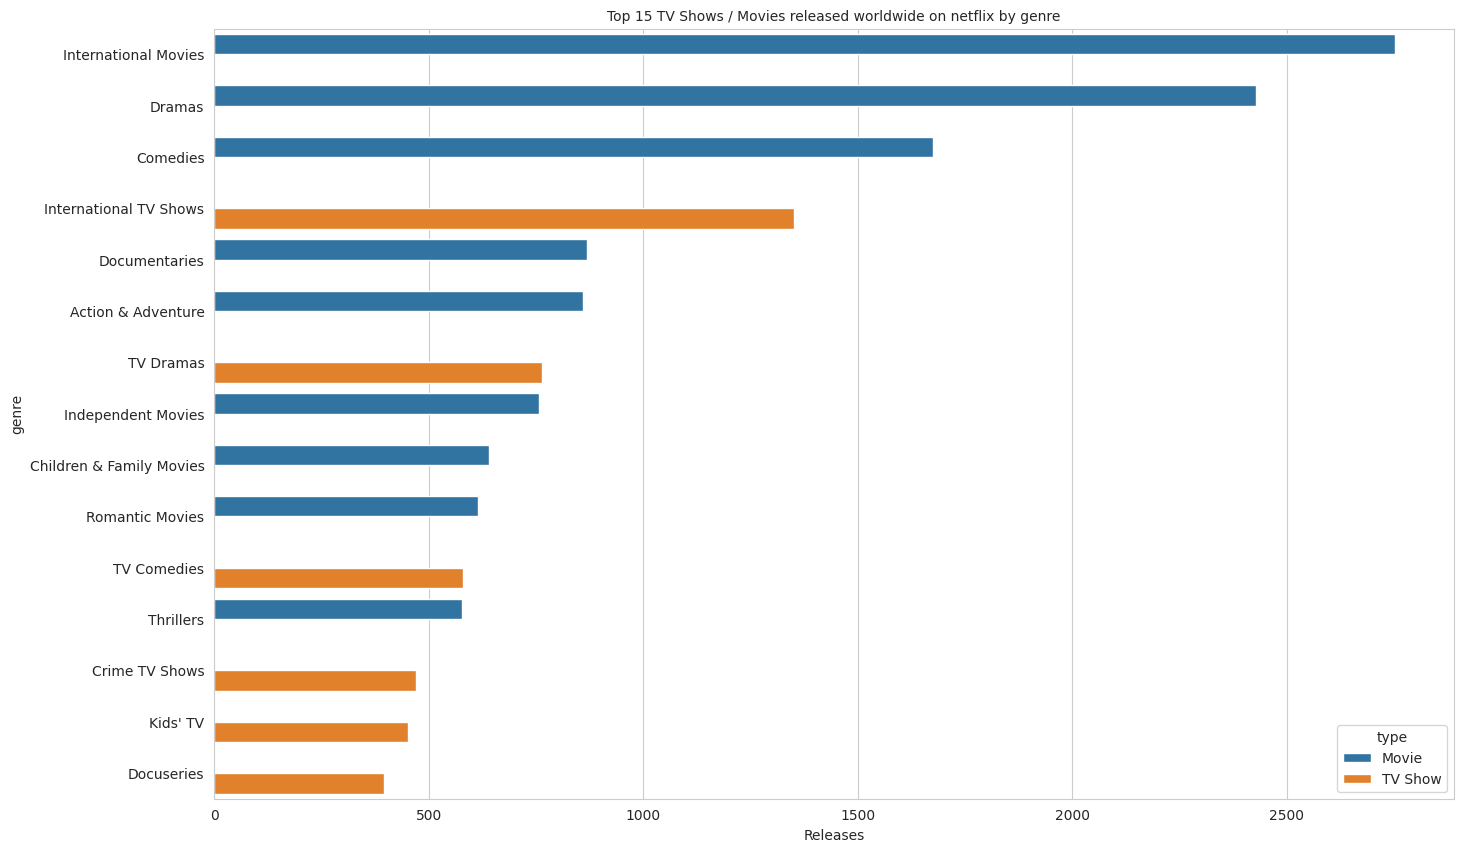

In [ ]:
#Top 15 genres across TV shows / Movies.
top15_genres = df_genre["genre"].value_counts().index[:15]
top15_data = df_genre.loc[df_genre['genre'].isin(top15_genres)]
fig = plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.countplot(data=top15_data, y='genre', order=top15_data['genre'].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases", fontsize=10)
plt.title('Top 15 TV Shows / Movies released worldwide on netflix by genre', fontsize=10)
plt.show()

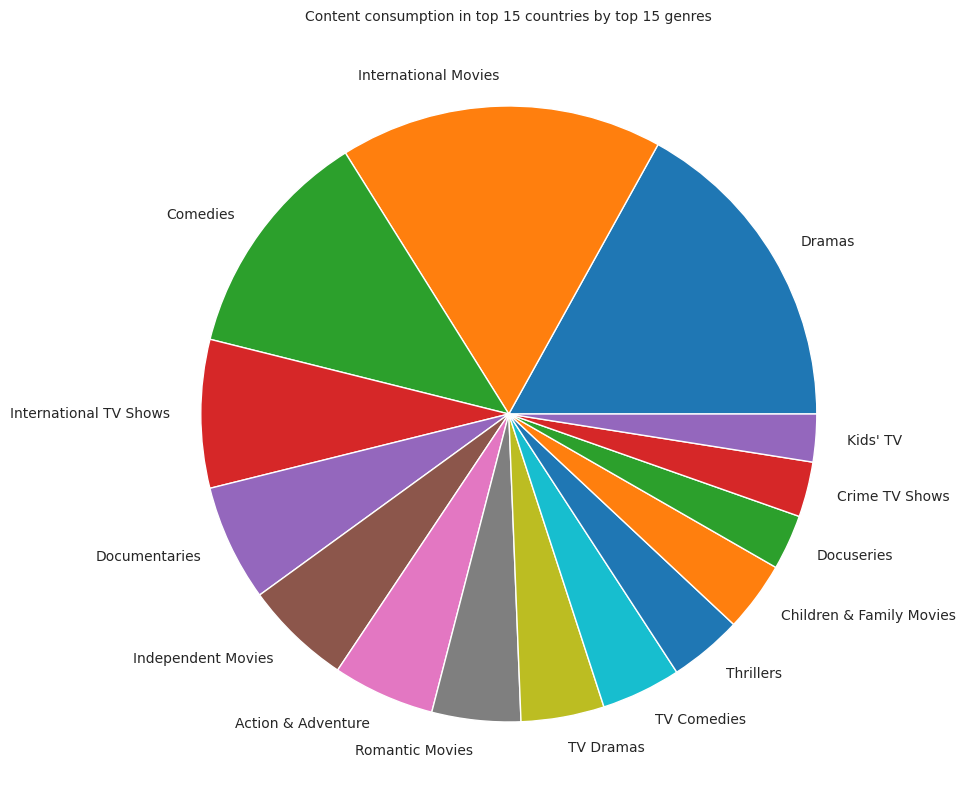

In [ ]:
#Share of top 15 genres in top 15 countries
top15_country = df_genre[df_genre["country"] != 'Unknown Country']["country"].value_counts().index[:15]
top15_data = df_genre.loc[ (df_genre["country"].isin(top15_country)) & (df_genre["genre"].isin(top15_genres))]
plt.figure(figsize=(13,10))
plt.title("Content consumption in top 15 countries by top 15 genres", fontsize=10)
g = plt.pie(x=top15_data['genre'].value_counts().values, labels=top15_data['genre'].value_counts().index)
plt.show()

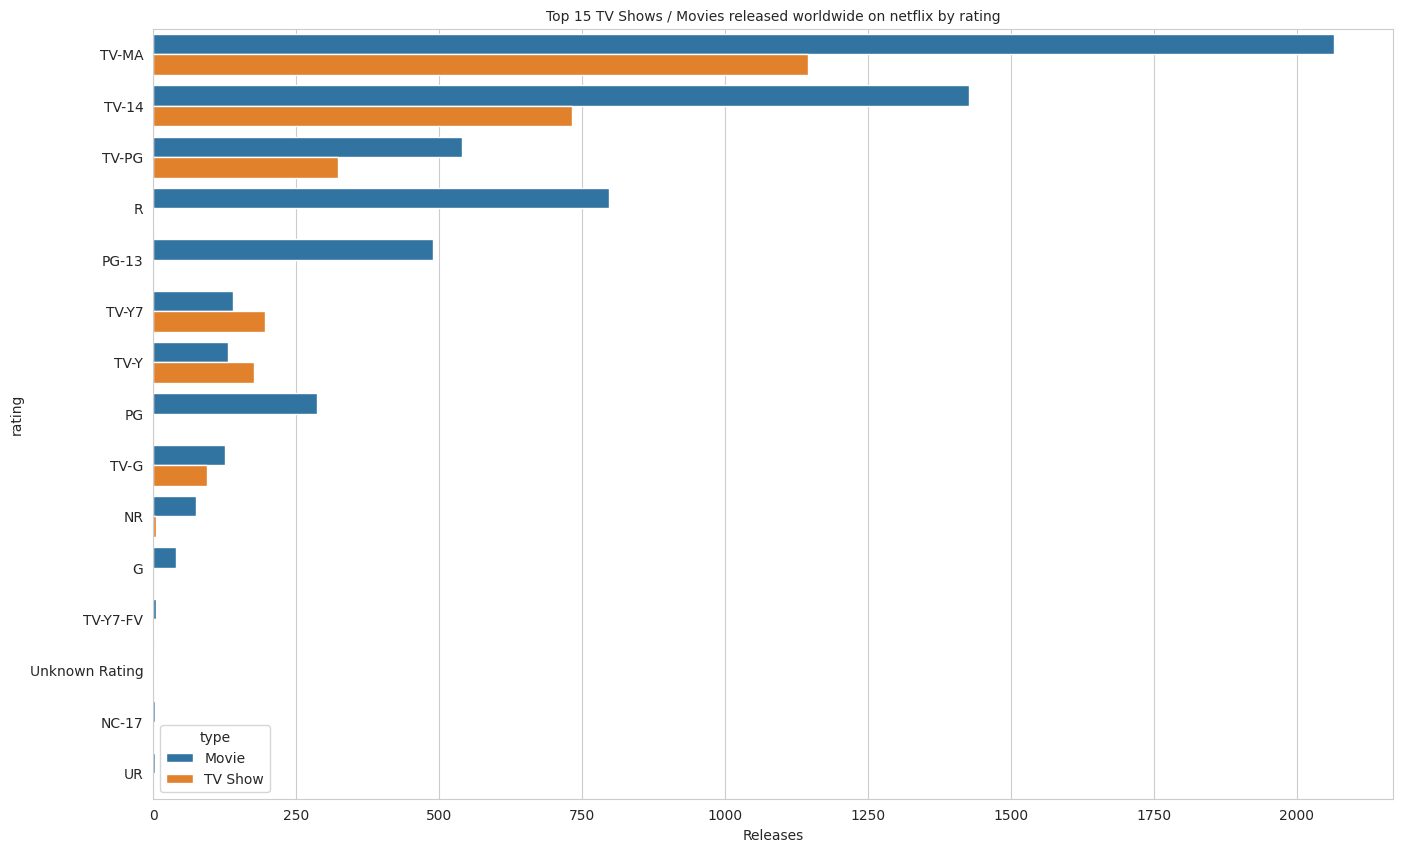

In [ ]:
#Number of TV shows / Movies by rating
top15_ratings = df[df["rating"] != 'Not rated']['rating'].value_counts().index[:15]
top15_data = df.loc[df['rating'].isin(top15_ratings)]
fig = plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.countplot(data=top15_data, y='rating', order=top15_data['rating'].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases", fontsize=10)
plt.title('Top 15 TV Shows / Movies released worldwide on netflix by rating', fontsize=10)
plt.show()

In [ ]:
'''
'TV-Y': 'Kids',
'TV-G': 'Kids',
'G': 'Kids',
'TV-PG': 'Older Kids',
'TV-Y7-FV': 'Older Kids',
'TV-Y7': 'Older Kids',
'PG': 'Older Kids',
'TV-14': 'Teens',
'PG-13': 'Teens',
'UR': 'Adults',
'NC-17': 'Adults'
'TV-MA': 'Adults',
'R': 'Adults',
'NR': 'Adults'
'''
def rating_category(df):
  if df == 'TV-Y' or df == 'TV-G' or df == 'G':
    return 'Kids'
  elif df == 'TV-PG' or df == 'TV-Y7-FV' or df == 'TV-Y7' or df == 'PG':
    return 'Older Kids'
  elif df == 'TV-14' or df == 'PG-13':
    return 'Teens'
  elif df == 'UR' or df == 'NC-17' or df == 'TV-MA' or df == 'R' or df == 'NR':
    return 'Adults'
df['rating_cat'] = df['rating'].apply(rating_category)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,rating_cat
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],Teens
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",Adults


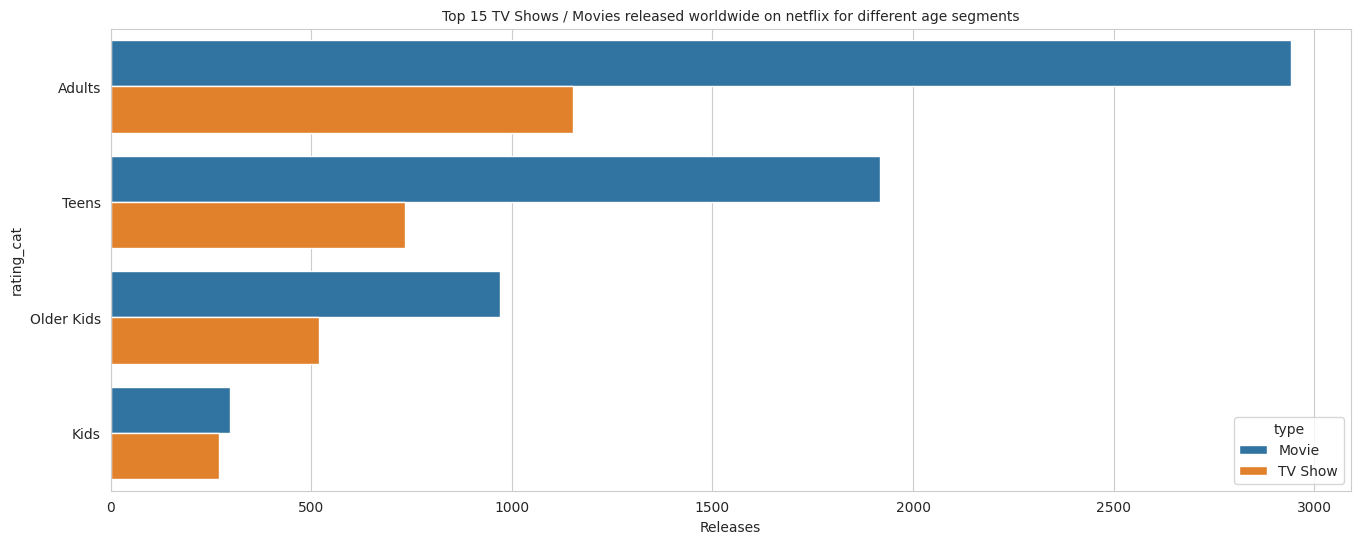

In [ ]:
#Content serving different age segments. e.g. Adults, Teens etc.
fig = plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(data=df, y='rating_cat', order=df['rating_cat'].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases", fontsize=10)
plt.title('Top 15 TV Shows / Movies released worldwide on netflix for different age segments', fontsize=10)
plt.show()

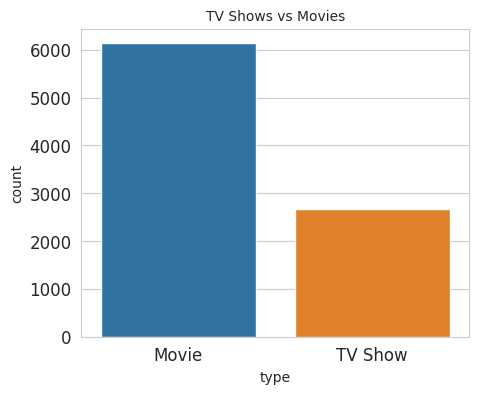

In [ ]:
#Comparison of total quantity - 'TV Show vs Movie'
fig = plt.figure(figsize=(5, 4))
sns.set_style("whitegrid")
sns.countplot(data=df,x='type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('TV Shows vs Movies', fontsize=10)
plt.show()

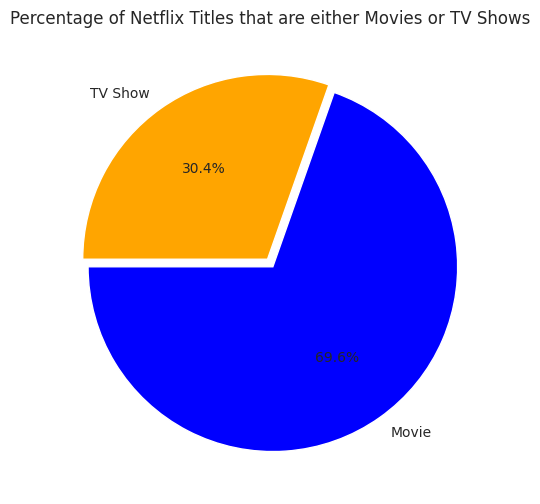

In [ ]:
#Percentage share of 'TV Show vs Movie'
plt.figure(figsize=(12,6))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['blue','orange'],autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
#Unique movie titles per country
temp = df_country[df_country['type'] =='Movie'].groupby("country")['title'].nunique().sort_values(ascending=False)
print(temp)
#Unique TV show titles per country
temp = df_country[df_country['type'] =='TV Show'].groupby("country")['title'].nunique().sort_values(ascending=False)
print(temp)

country
United States      2751
India               962
United Kingdom      532
Unknown Country     440
Canada              319
                   ... 
Nicaragua             1
Palestine             1
Panama                1
Paraguay              1
Malawi                1
Name: title, Length: 123, dtype: int64
country
United States      938
Unknown Country    391
United Kingdom     272
Japan              199
South Korea        170
                  ... 
Switzerland          1
Hungary              1
Malta                1
Mauritius            1
                     1
Name: title, Length: 67, dtype: int64


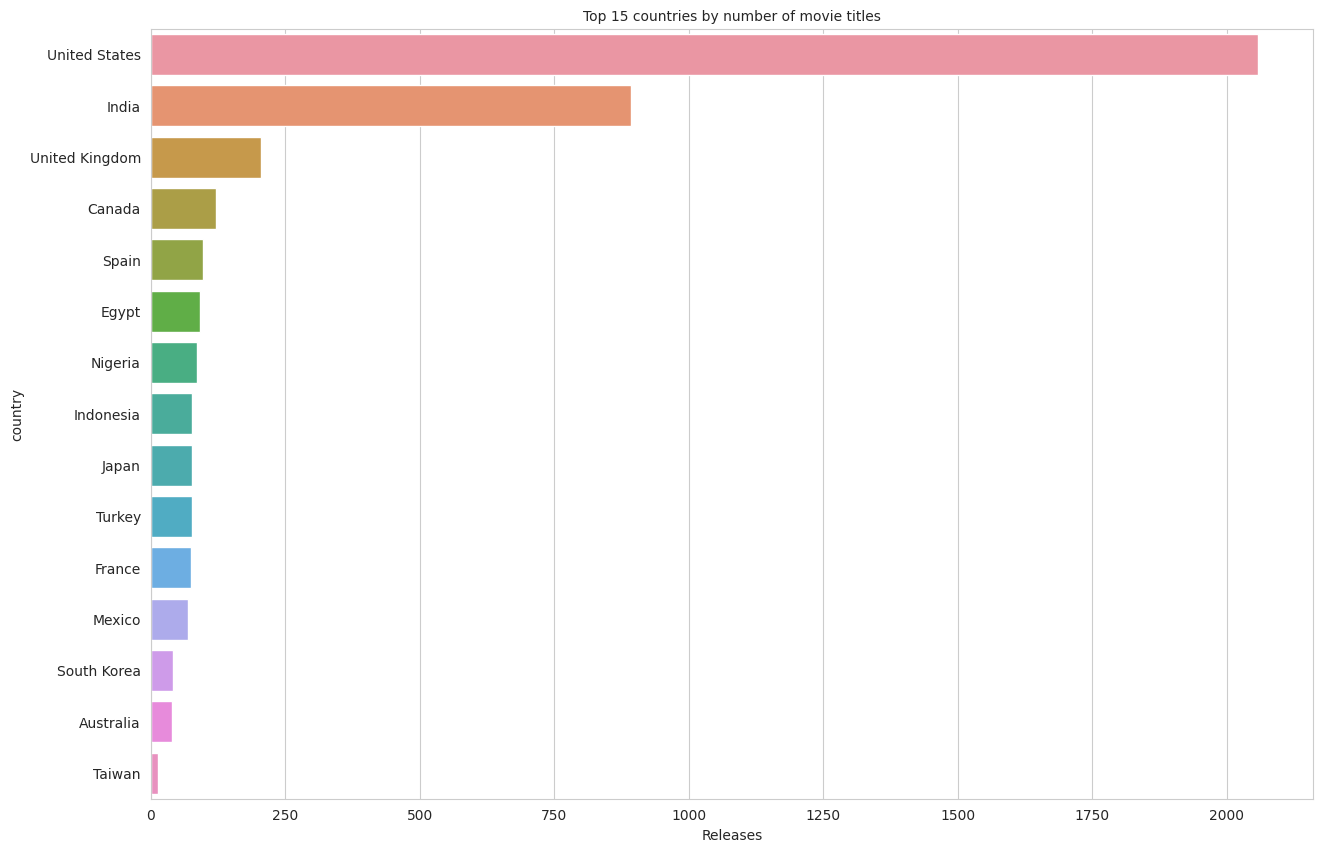

In [ ]:
#Analysis of top 15 countries by 'Movie' content
top15_country = df[df["country"] != 'Unknown Country']["country"].value_counts().index[:15]
top15_data = df.loc[(df["country"].isin(top15_country)) &(df['type'] == 'Movie')]
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
#sns.countplot(data=top15_data,y='country', order=top15_data['country'].value_counts().index, hue='type')
sns.countplot(data=top15_data,y='country', order=top15_data.groupby("country")['title'].nunique().sort_values(ascending=False).index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 15 countries by number of movie titles', fontsize=10)
plt.show()

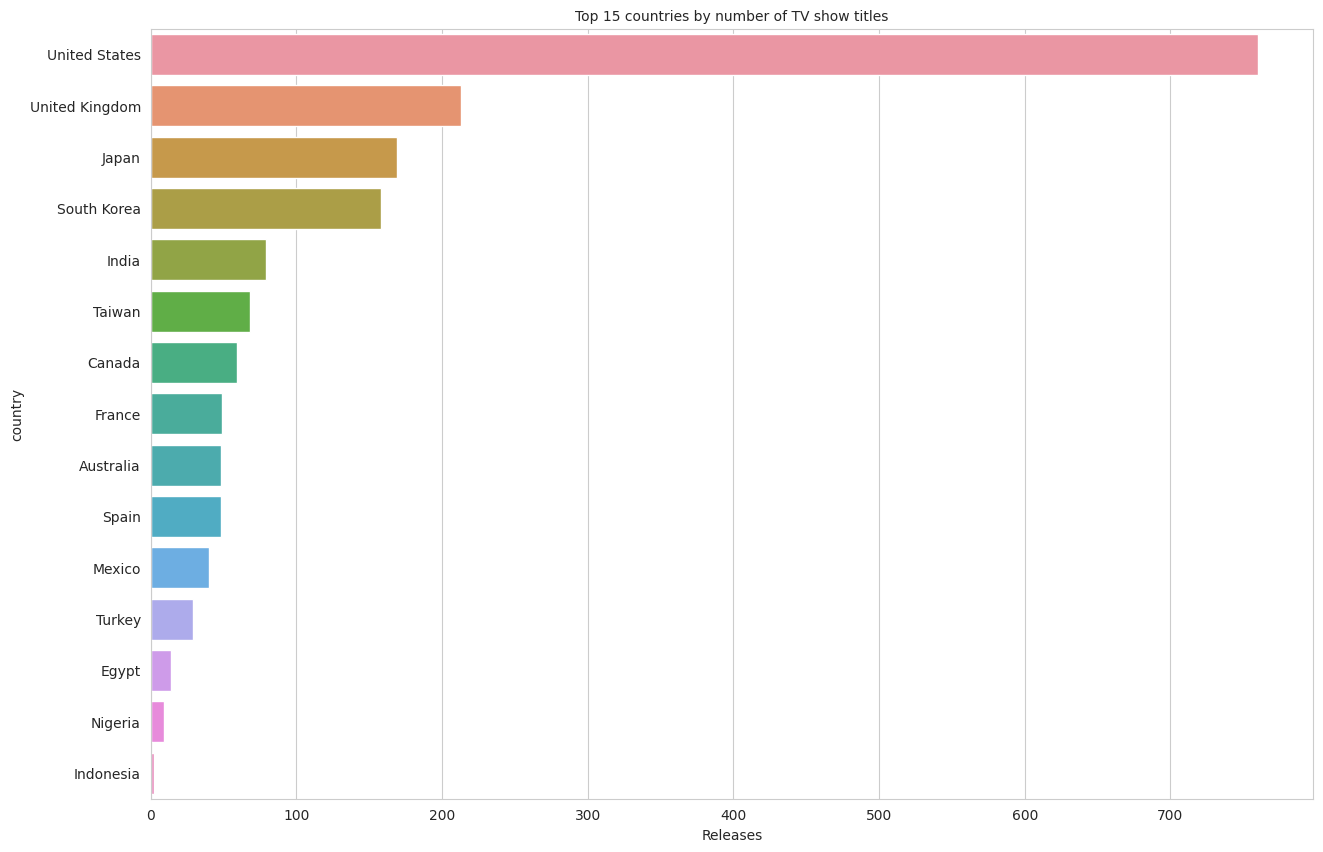

In [ ]:
#Analysis of top 15 countries by 'TV Show' content
top15_country = df[df["country"] != 'Unknown Country']["country"].value_counts().index[:15]
top15_data = df.loc[(df["country"].isin(top15_country)) &(df['type'] == 'TV Show')]
fig = plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
#sns.countplot(data=top15_data,y='country', order=top15_data['country'].value_counts().index, hue='type')
sns.countplot(data=top15_data,y='country', order=top15_data.groupby("country")['title'].nunique().sort_values(ascending=False).index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 15 countries by number of TV show titles', fontsize=10)
plt.show()

**3. What is the best time to launch a TV show?**

In [ ]:
#Dataframe to find correlation between numeric data
df_t = df.copy()
df_t["date_added"] = pd.to_datetime(df_t['date_added'])
df_t['year_added'] = df_t['date_added'].dt.year
df_t['month_added'] = df_t['date_added'].dt.month
df_t['day_added'] = df_t['date_added'].dt.dayofweek
df_t["week_added"] = df_t['date_added'].dt.week
df_t['release_year'] = df_t['release_year'].astype('float64')
df_t[['duration_int','unit_duration']] = df["duration"].str.split(' ', expand=True)
df_t['duration_int'] = df_t['duration_int'].astype('float64')
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8807 non-null   object        
 1   type           8807 non-null   object        
 2   title          8807 non-null   object        
 3   director       8807 non-null   object        
 4   cast           8807 non-null   object        
 5   country        8807 non-null   object        
 6   date_added     8807 non-null   datetime64[ns]
 7   release_year   8807 non-null   float64       
 8   rating         8807 non-null   object        
 9   duration       8807 non-null   object        
 10  listed_in      8807 non-null   object        
 11  description    8807 non-null   object        
 12  genre          8807 non-null   object        
 13  rating_cat     8803 non-null   object        
 14  year_added     8807 non-null   int64         
 15  month_added    8807 n

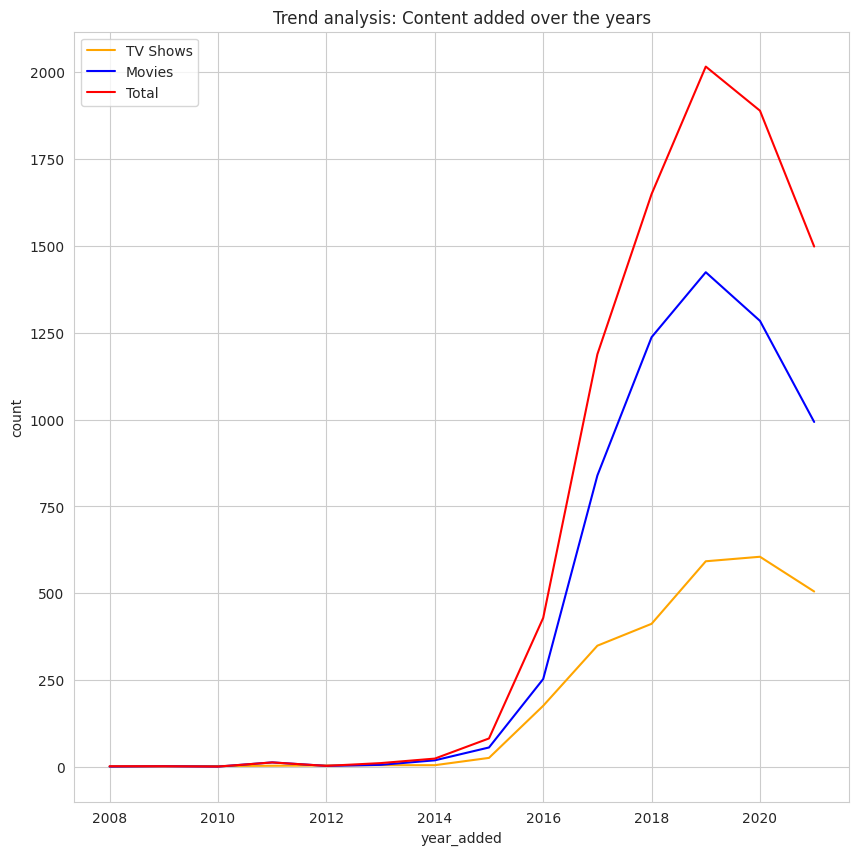

In [ ]:
#Line plot to show content added on netflix over the years
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_style("whitegrid")
plt.title("Trend analysis: Content added over the years")
content_data = df_t.groupby(['type', 'year_added']).size().reset_index(name='count')
content_data_total = df_t.groupby('year_added').size().reset_index(name='count')
sns.lineplot(x="year_added",y="count",data=content_data[content_data["type"] == 'TV Show'],label="TV Shows", color='orange') #TV shows
sns.lineplot(x="year_added",y="count",data=content_data[content_data["type"] == 'Movie'],label="Movies", color='blue') #movies
sns.lineplot(x="year_added",y="count",data=content_data_total,label="Total", color='red') #Total
plt.show()

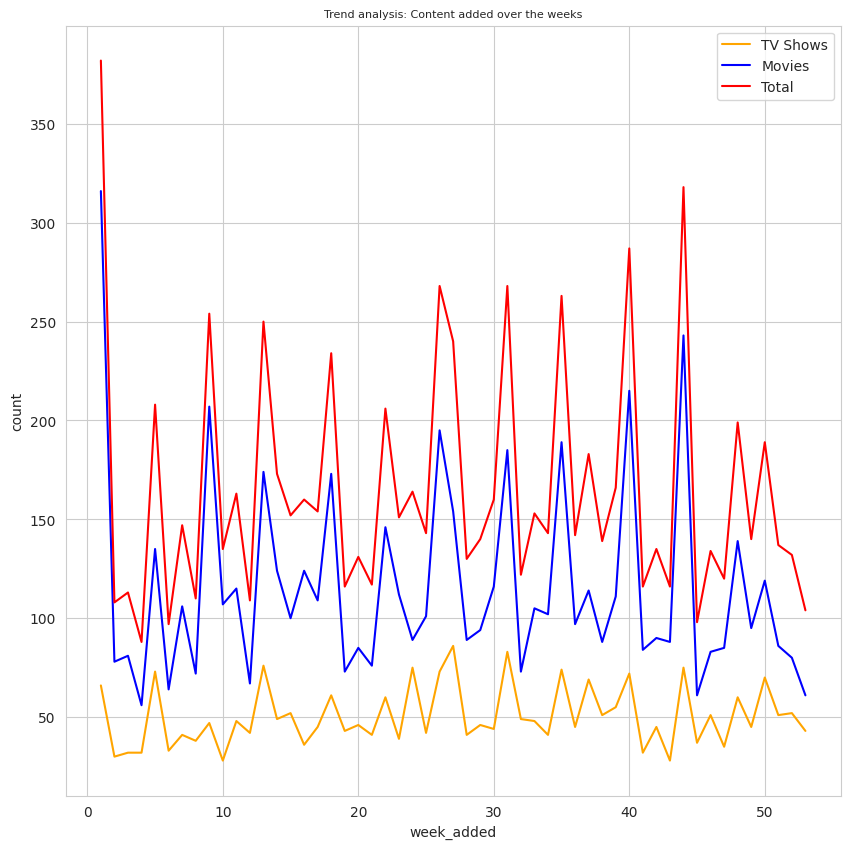

In [ ]:
#Line plot to show content added weekly on netflix over the year
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_style("whitegrid")
plt.title("Trend analysis: Content added over the weeks", fontsize=8)
content_data = df_t.groupby(['week_added', 'type']).size().reset_index(name='count')
content_data_total = df_t.groupby('week_added').size().reset_index(name='count')
sns.lineplot(x="week_added",y="count",data=content_data[content_data["type"] == 'TV Show'],label="TV Shows", color='orange') #TV shows
sns.lineplot(x="week_added",y="count",data=content_data[content_data["type"] == 'Movie'],label="Movies", color='blue') #movies
sns.lineplot(x="week_added",y="count",data=content_data_total,label="Total", color='red') #Total
plt.show()

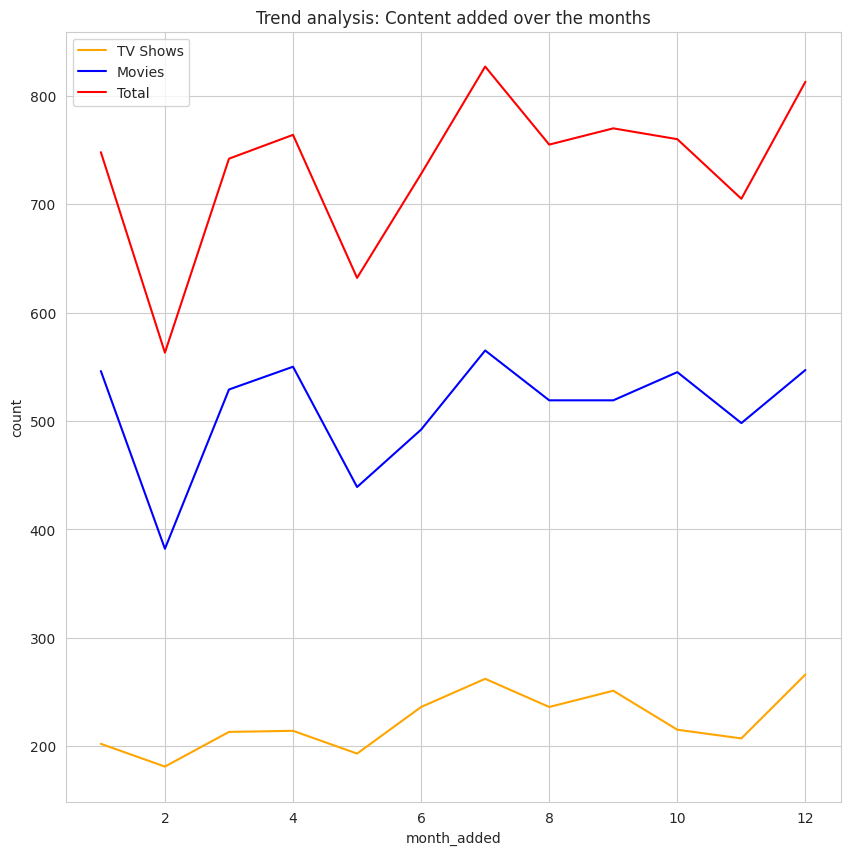

In [ ]:
#Line plot to show content added on netflix month-wise
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_style("whitegrid")
plt.title("Trend analysis: Content added over the months")
content_data = df_t.groupby(['type', 'month_added']).size().reset_index(name='count')
content_data_total = df_t.groupby('month_added').size().reset_index(name='count')
sns.lineplot(x="month_added",y="count",data=content_data[content_data["type"] == 'TV Show'],label="TV Shows", color='orange') #TV shows
sns.lineplot(x="month_added",y="count",data=content_data[content_data["type"] == 'Movie'],label="Movies", color='blue') #movies
sns.lineplot(x="month_added",y="count",data=content_data_total,label="Total", color='red') #Total
plt.show()

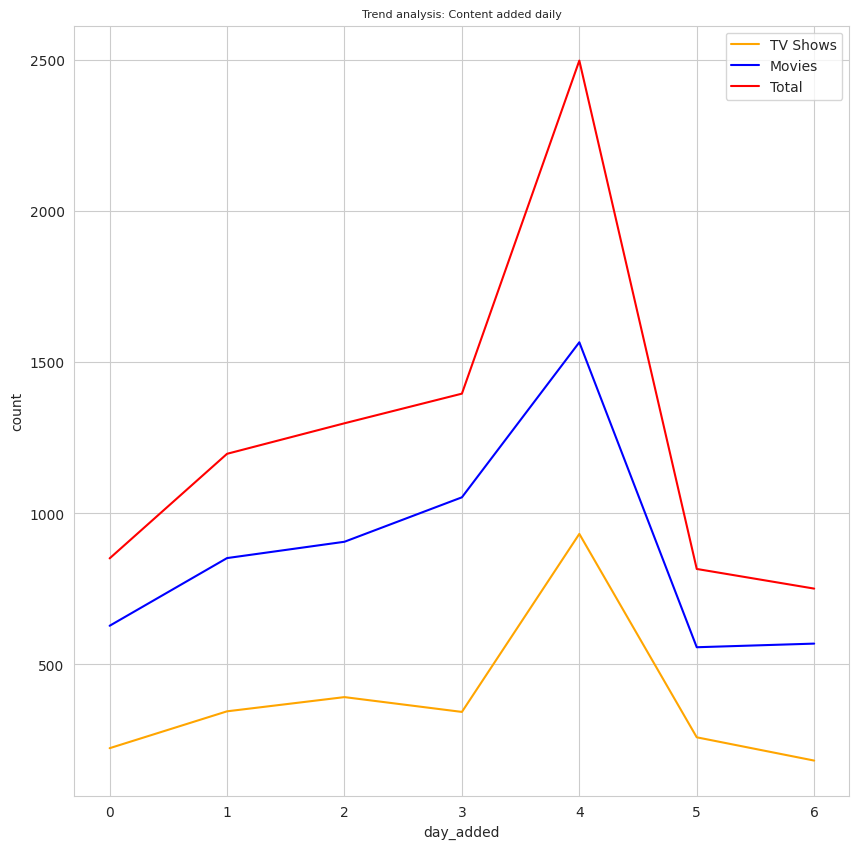

In [ ]:
#Line plot to show content added daily on netflix
#Most content is added on Friday (dayofweek=4)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.set_style("whitegrid")
plt.title("Trend analysis: Content added daily", fontsize=8)
content_data = df_t.groupby(['type', 'day_added']).size().reset_index(name='count')
content_data_total = df_t.groupby('day_added').size().reset_index(name='count')
sns.lineplot(x="day_added",y="count",data=content_data[content_data["type"] == 'TV Show'],label="TV Shows", color='orange') #TV shows
sns.lineplot(x="day_added",y="count",data=content_data[content_data["type"] == 'Movie'],label="Movies", color='blue') #movies
sns.lineplot(x="day_added",y="count",data=content_data_total,label="Total", color='red') #Total
plt.show()

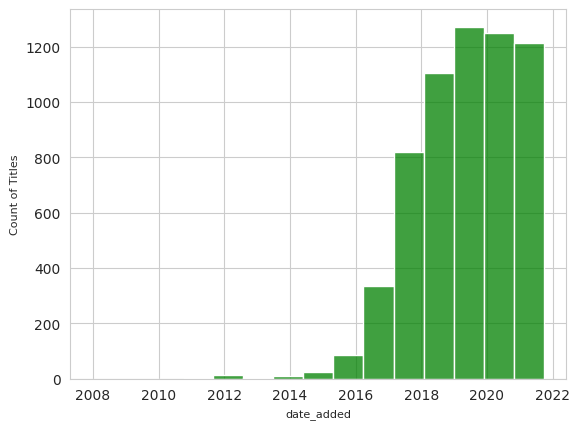

In [ ]:
#Histogram analysis to show when was most of the movies were added to Netflix
sns.histplot(df_t[df_t['type'] == 'Movie']['date_added'], bins=15, color='g')
plt.ylabel('Count of Titles', fontsize=8)
plt.xlabel('date_added', fontsize=8)
plt.show()

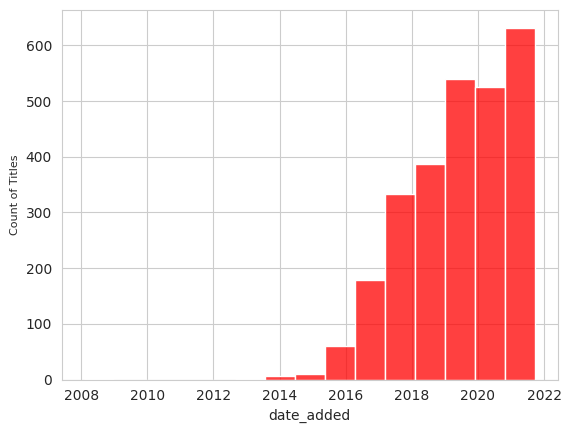

In [ ]:
#Histogram analysis to show when was most of the TV shows were added to Netflix
sns.histplot(df_t[df_t['type'] == 'TV Show']['date_added'], bins=15, color='r')
plt.ylabel('Count of Titles', fontsize=8)
plt.xlabel('date_added', fontsize=10)
plt.show()


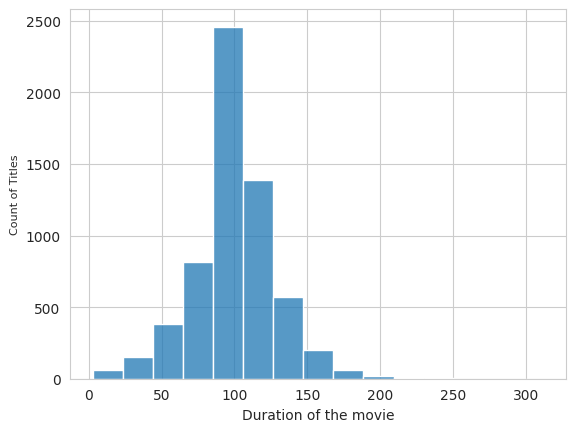

In [ ]:
#Histogram to show distribution of 'Movie' content by duration of movies
sns.histplot(df_t[df_t['type'] == 'Movie']['duration_int'], bins=15)
plt.ylabel('Count of Titles', fontsize=8)
plt.xlabel('Duration of the movie', fontsize=10)
plt.show()

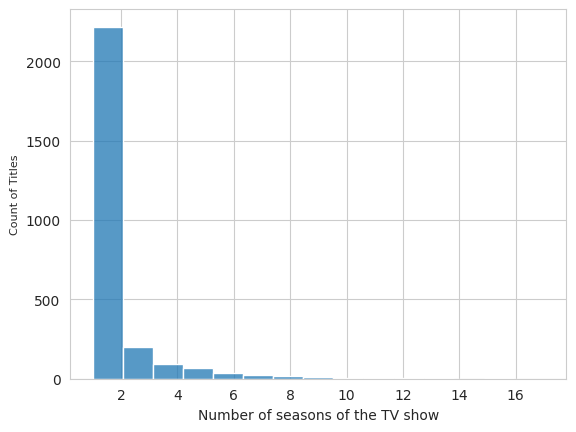

In [ ]:
#Histogram to show distribution of TV show content by number of seasons
sns.histplot(df_t[df_t['type'] == 'TV Show']['duration_int'], bins=15)
plt.ylabel('Count of Titles', fontsize=8)
plt.xlabel('Number of seasons of the TV show', fontsize=10)
plt.show()

**4 Analysis of actors/directors of different types of shows/movies.**



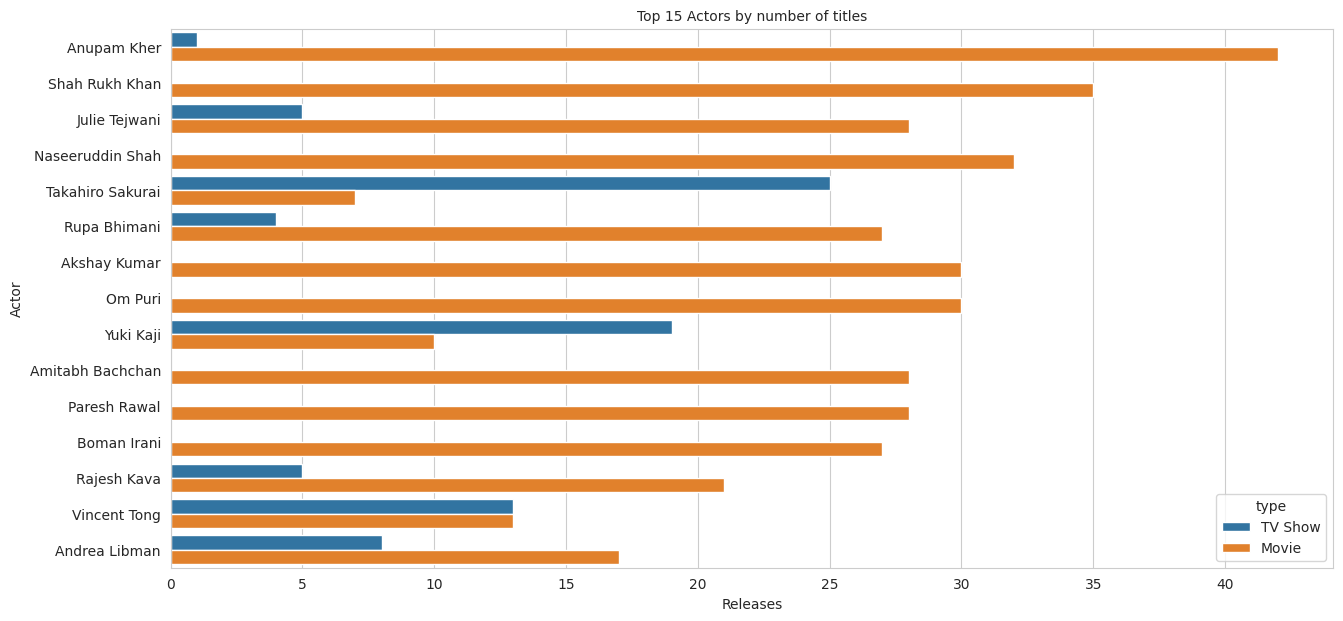

In [ ]:
#Find top 15 actors by count of titles
top15_actors = df_cast[df_cast["cast"] != 'Unknown Actor']["cast"].value_counts().index[:15]
top15_data = df_cast.loc[df_cast['cast'].isin(top15_actors)]
#print(top15_actors)
#print(top15_data)
fig = plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.countplot(y='cast', data=top15_data, order=top15_data["cast"].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.ylabel("Actor")
plt.title('Top 15 Actors by number of titles', fontsize=10)
plt.show()

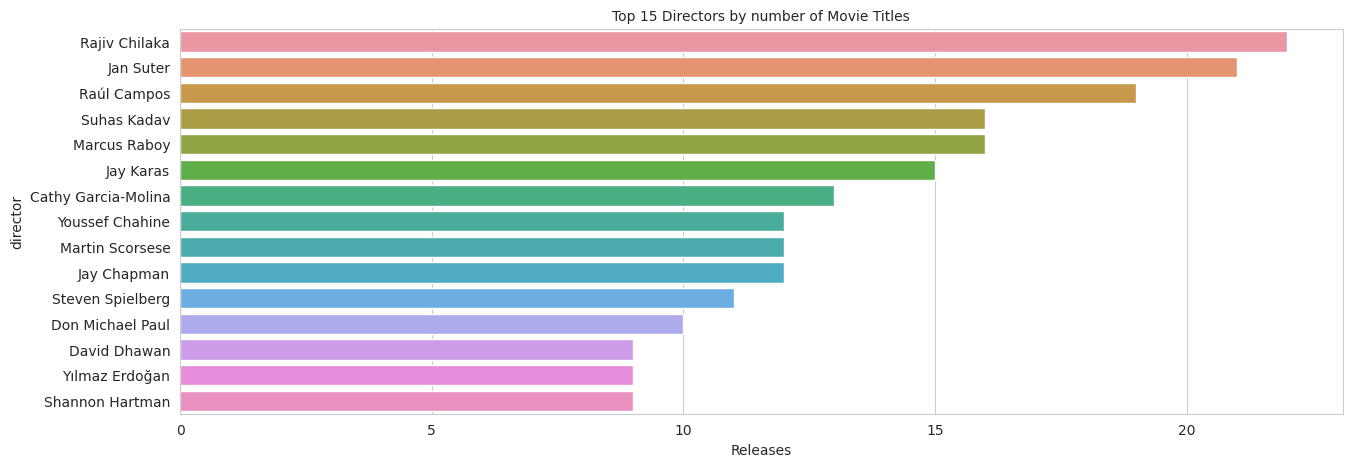

In [ ]:
#Analysis of top 15 directors by number of movie titles
top15_director = df_director[(df_director["director"] != 'Unknown Director') & (df_director["type"] == 'Movie')]["director"].value_counts().index[:15]
top15_data = df_director.loc[ df_director["director"].isin(top15_director)]
#print(df_director[df_director['type']=='TV Show']['director'].nunique())
fig = plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.countplot(data=top15_data,y='director', order=top15_data['director'].value_counts().index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 15 Directors by number of Movie Titles', fontsize=10)
plt.show()

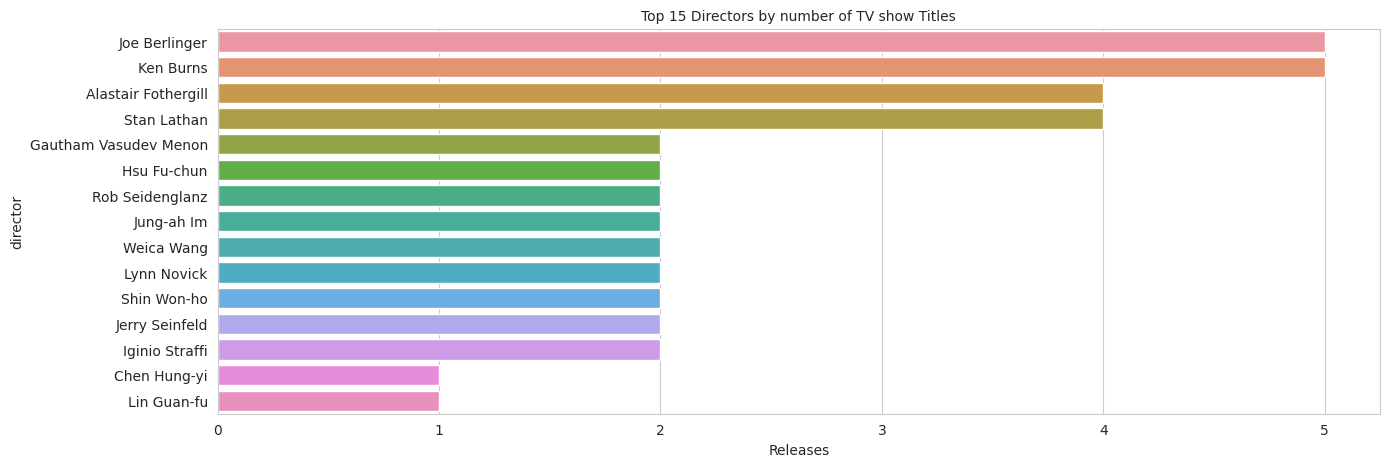

In [ ]:
#Analysis of top 15 directors by number of TV Show titles
top15_director = df_director[(df_director["director"] != 'Unknown Director') & (df_director["type"] == 'TV Show')]["director"].value_counts().index[:15]
top15_data = df_director.loc[ df_director["director"].isin(top15_director)]
#print(df_director[df_director['type']=='TV Show']['director'].nunique())
fig = plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.countplot(data=top15_data,y='director', order=top15_data['director'].value_counts().index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 15 Directors by number of TV show Titles', fontsize=10)
plt.show()

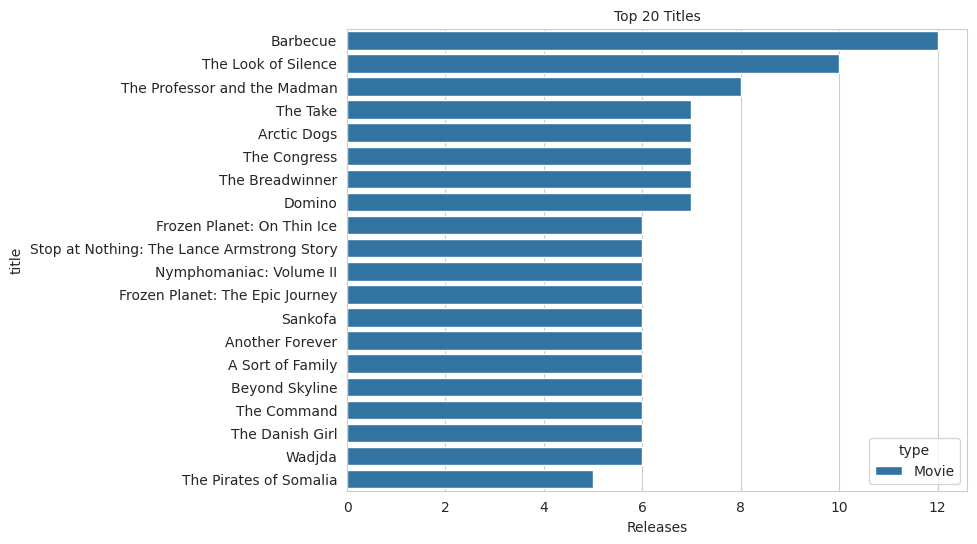

In [ ]:
#Analysis of top 20 Movies
top10_title = df_country[(["country"] != 'Unknown Country') & (df_country["type"] == 'Movie')]["title"].value_counts().index[:20]
top10_data = df_country[df_country["title"].isin(top10_title)]
fig = plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(data=top10_data, y='title', order=top10_data['title'].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 20 Titles', fontsize=10)
plt.show()

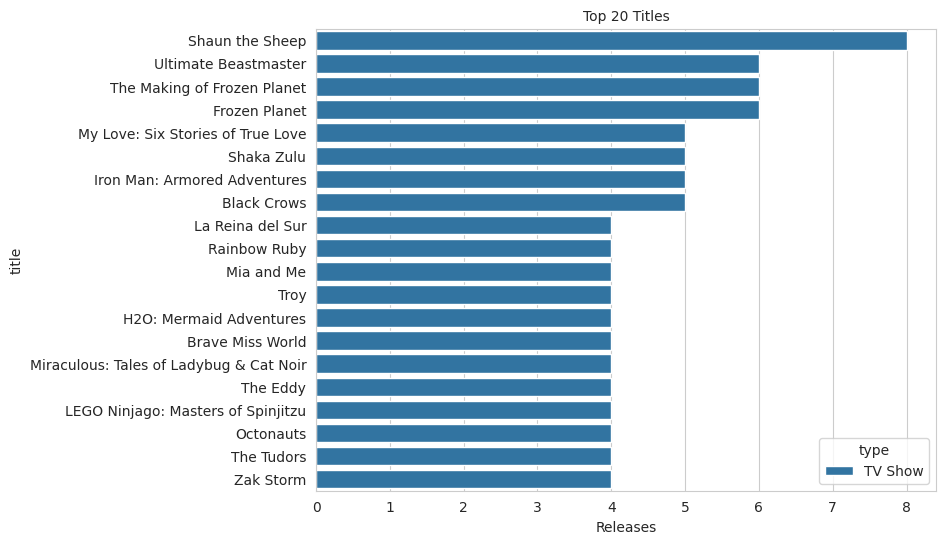

In [ ]:
#Analysis of top 20 TV shows
top10_title = df_country[(df_country["country"] != 'Unknown Country') & (df_country["type"] == 'TV Show')]["title"].value_counts().index[:20]
top10_data = df_country[ df_country["title"].isin(top10_title)]
fig = plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(data=top10_data, y='title', order=top10_data['title'].value_counts().index, hue='type')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Releases")
plt.title('Top 20 Titles', fontsize=10)
plt.show()

**4.2 For categorical variable(s): Boxplot **

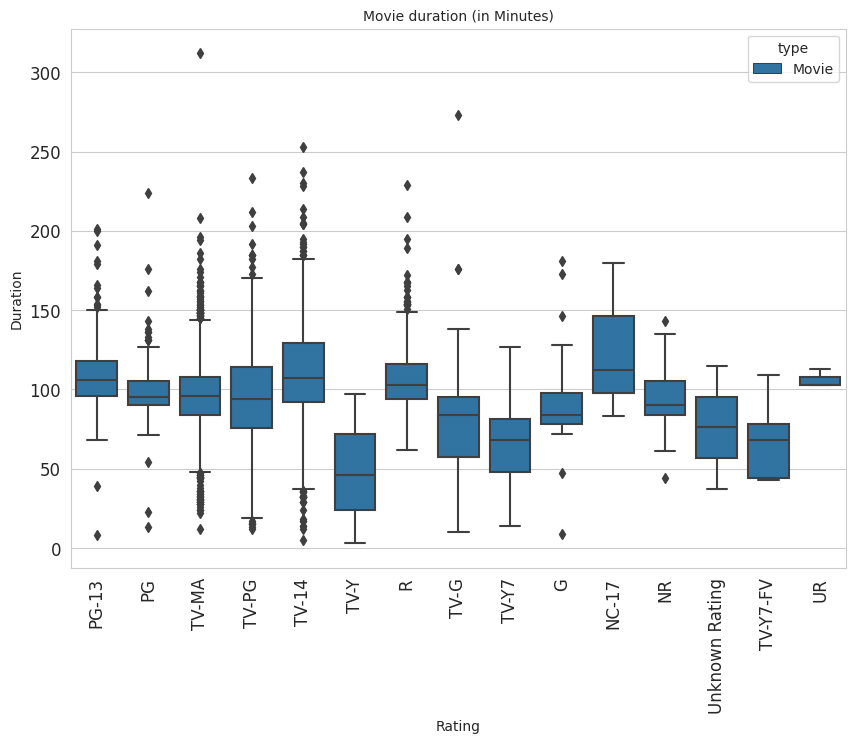

In [ ]:
#Boxplot to show the outliers (based on movie duration) for 'Movie' with various ratings
plt.figure(figsize = (10,7))
sns.boxplot(x='rating', y='duration_int', data=df_t[df_t['type'] == 'Movie'], hue='type')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Duration', fontsize=10)
plt.xlabel('Rating', fontsize=10)
plt.title("Movie duration (in Minutes)", fontsize=10)
plt.show()

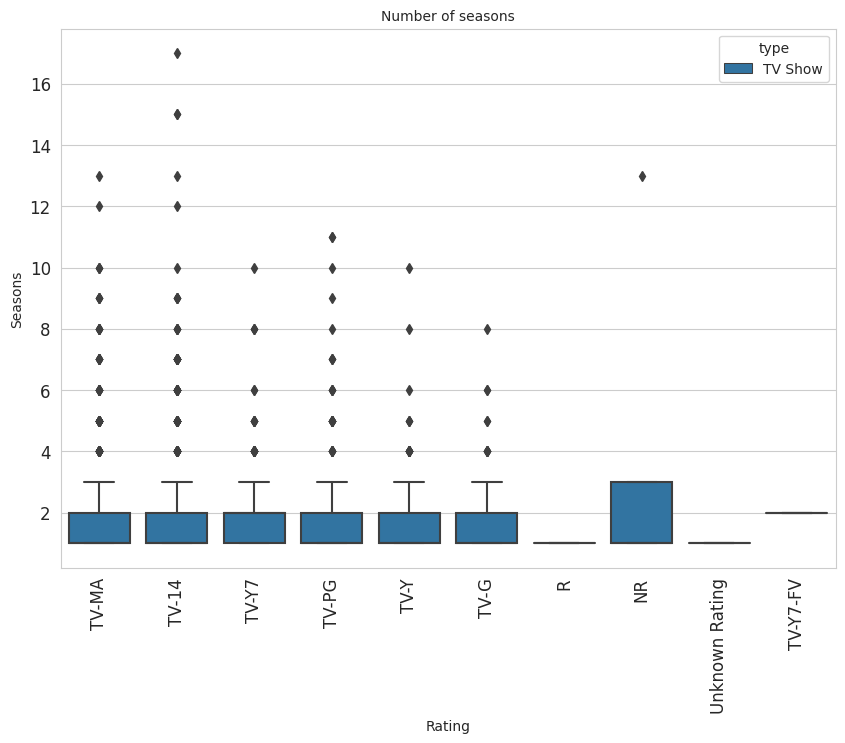

In [ ]:
#Boxplot to show the outliers (based on the number of seasons) for 'TV show' with various ratings
plt.figure(figsize = (10,7))
sns.boxplot(x='rating', y='duration_int', data=df_t[df_t['type'] == 'TV Show'], hue='type')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Seasons', fontsize=10)
plt.xlabel('Rating', fontsize=10)
plt.title("Number of seasons", fontsize=10)
plt.show()

In [ ]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19323 non-null  object
 1   type          19323 non-null  object
 2   title         19323 non-null  object
 3   director      19323 non-null  object
 4   cast          19323 non-null  object
 5   country       19323 non-null  object
 6   date_added    19323 non-null  object
 7   release_year  19323 non-null  int64 
 8   rating        19323 non-null  object
 9   duration      19323 non-null  object
 10  listed_in     19323 non-null  object
 11  description   19323 non-null  object
 12  genre         19323 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.1+ MB


**4.3 For correlation: Heatmaps, Pairplots **


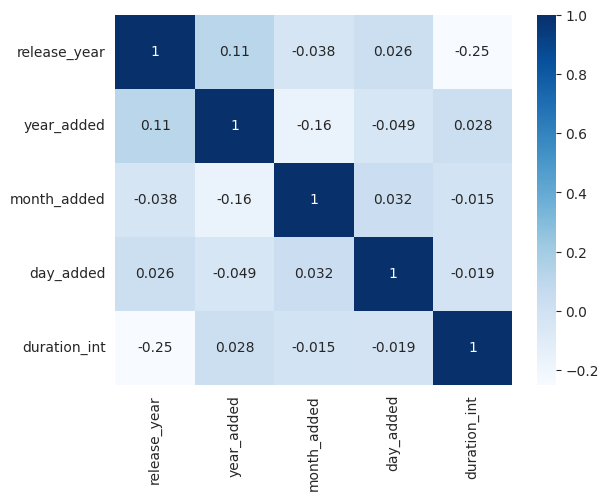

In [ ]:
#Correlation analysis of numerical data
corrs = df_t[['type', 'release_year', 'year_added', 'month_added', 'day_added', 'duration_int']].corr()
sns.heatmap(corrs, annot = True, cmap='Blues')
plt.show()

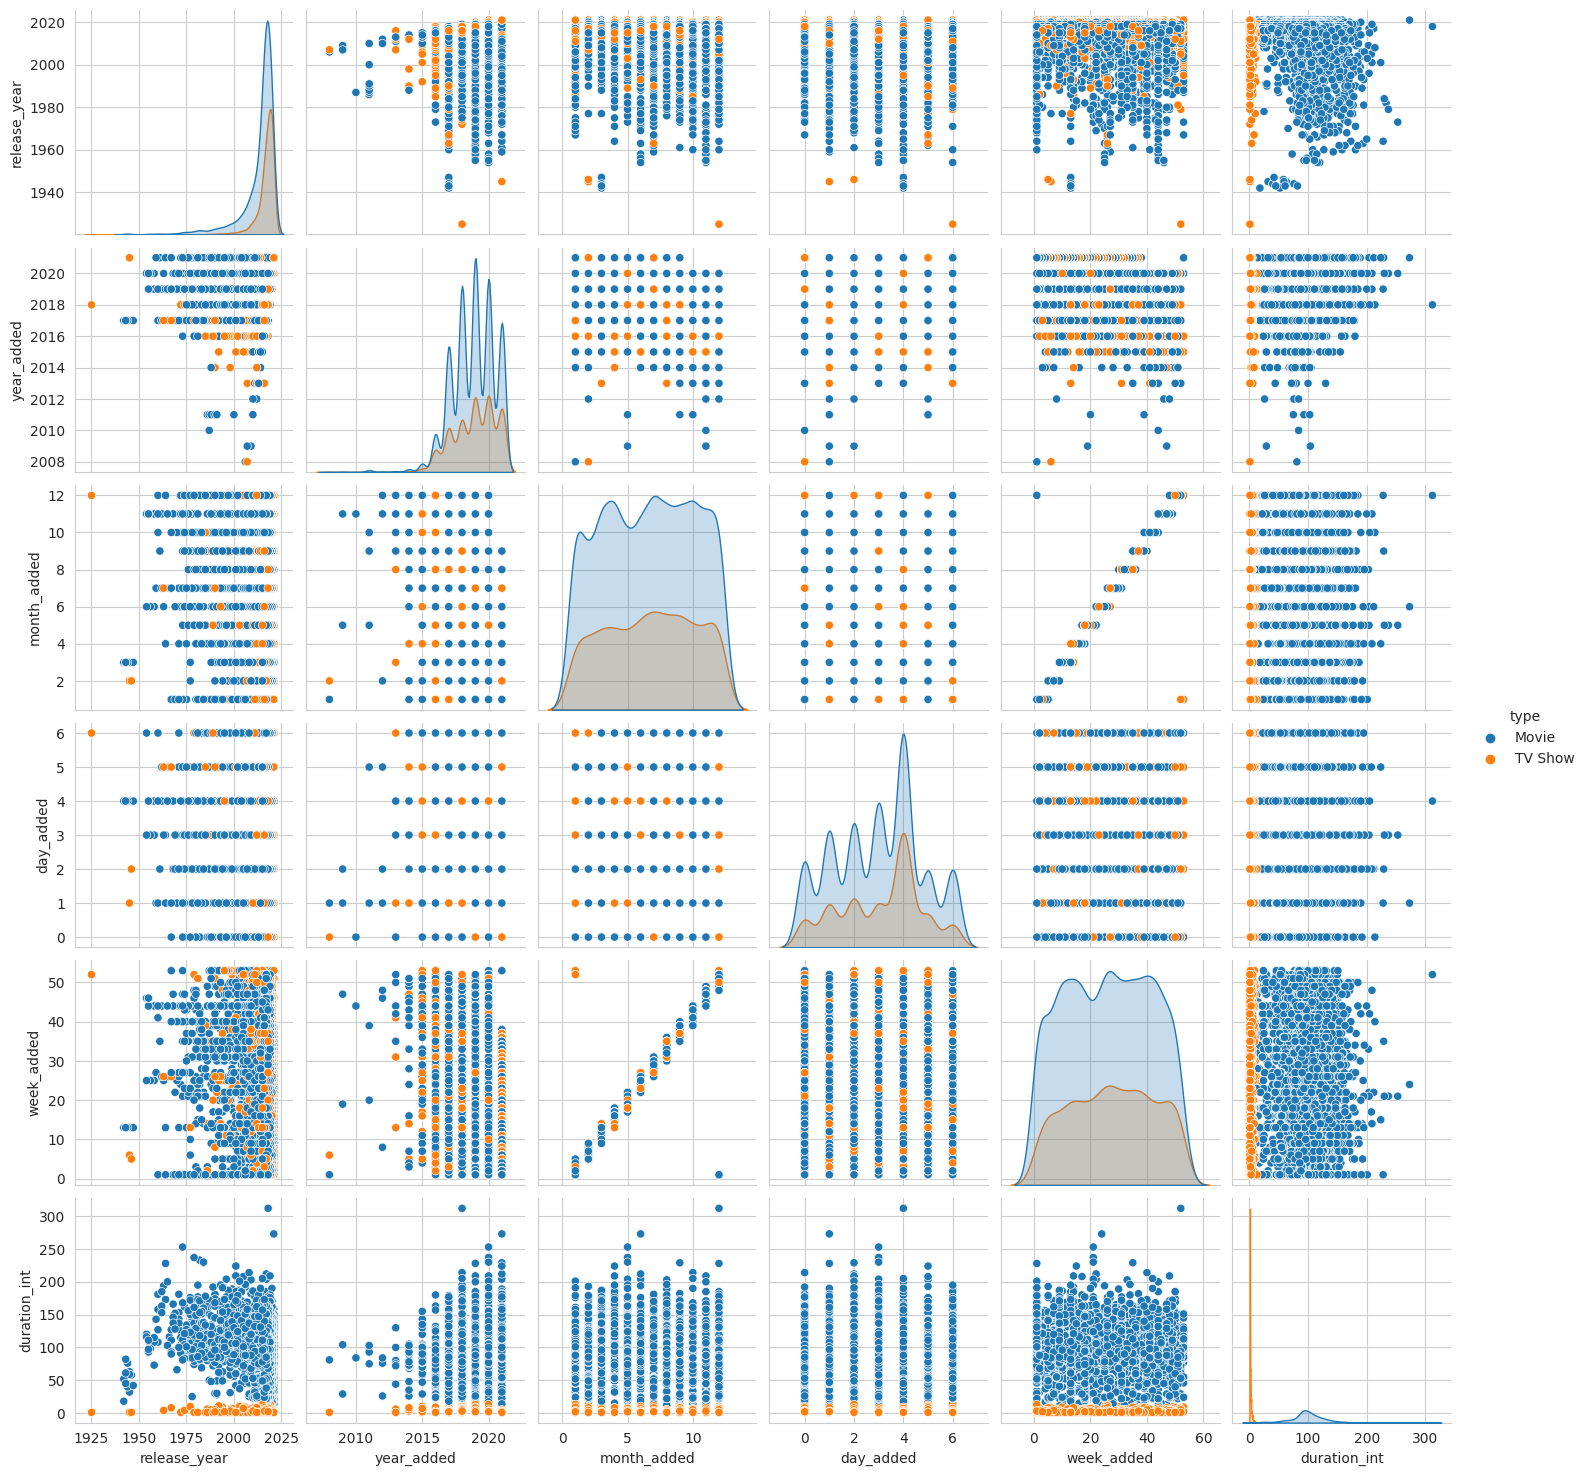

In [ ]:
sns.pairplot(data=df_t, hue="type")

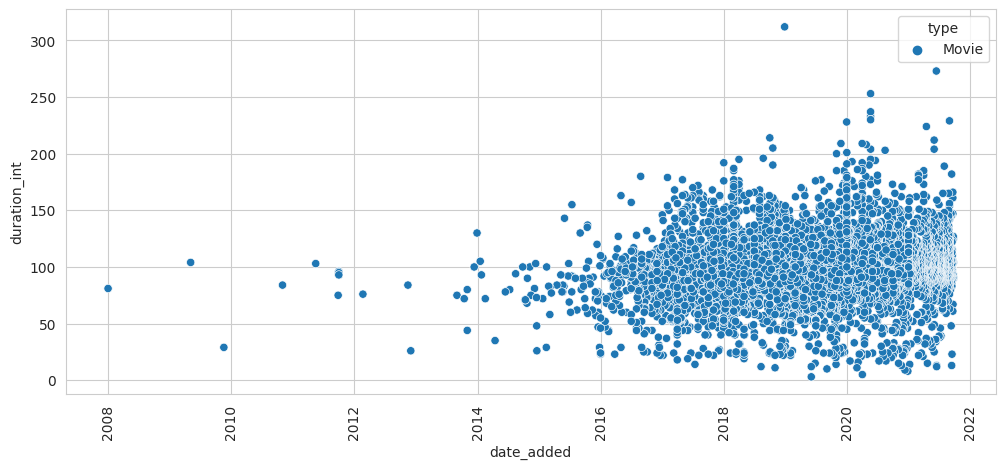

In [ ]:
#Duration of 'Movie' (in mins.) vs Date when it was added to Netflix (X-Axis)
plt.figure(figsize = (12,5))
sns.scatterplot(data=df_t[df_t['type'] == 'Movie'], y='duration_int', x='date_added', hue='type')
plt.xticks(rotation=90, fontsize=10)
plt.show()

<Axes: xlabel='date_added', ylabel='duration_int'>

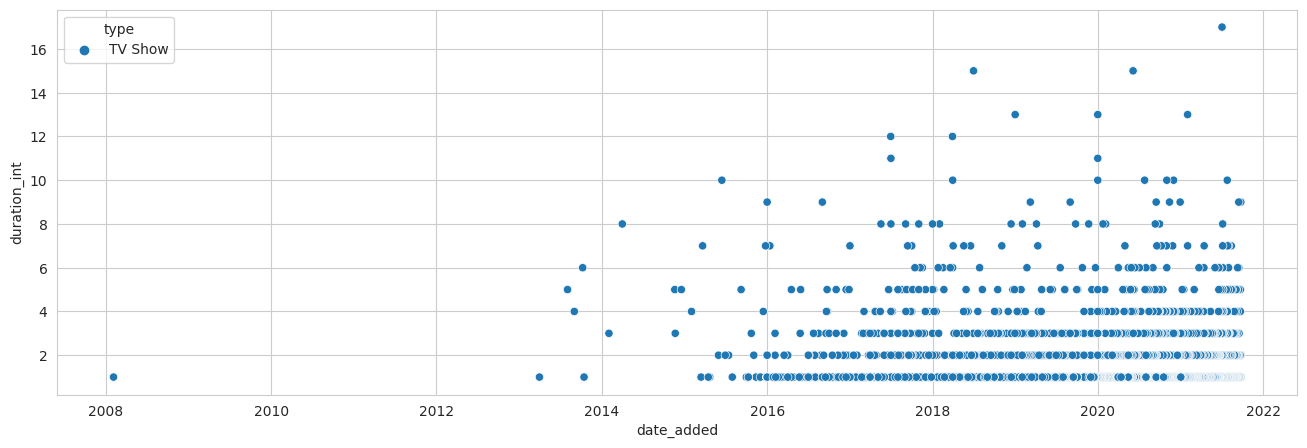

In [ ]:
#Number of seasons vs Date when 'TV show' was added to Netflix (X-Axis)
plt.figure(figsize = (16,5))
sns.scatterplot(data=df_t[df_t['type'] == 'TV Show'], y='duration_int', x='date_added', hue='type')

**6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)**

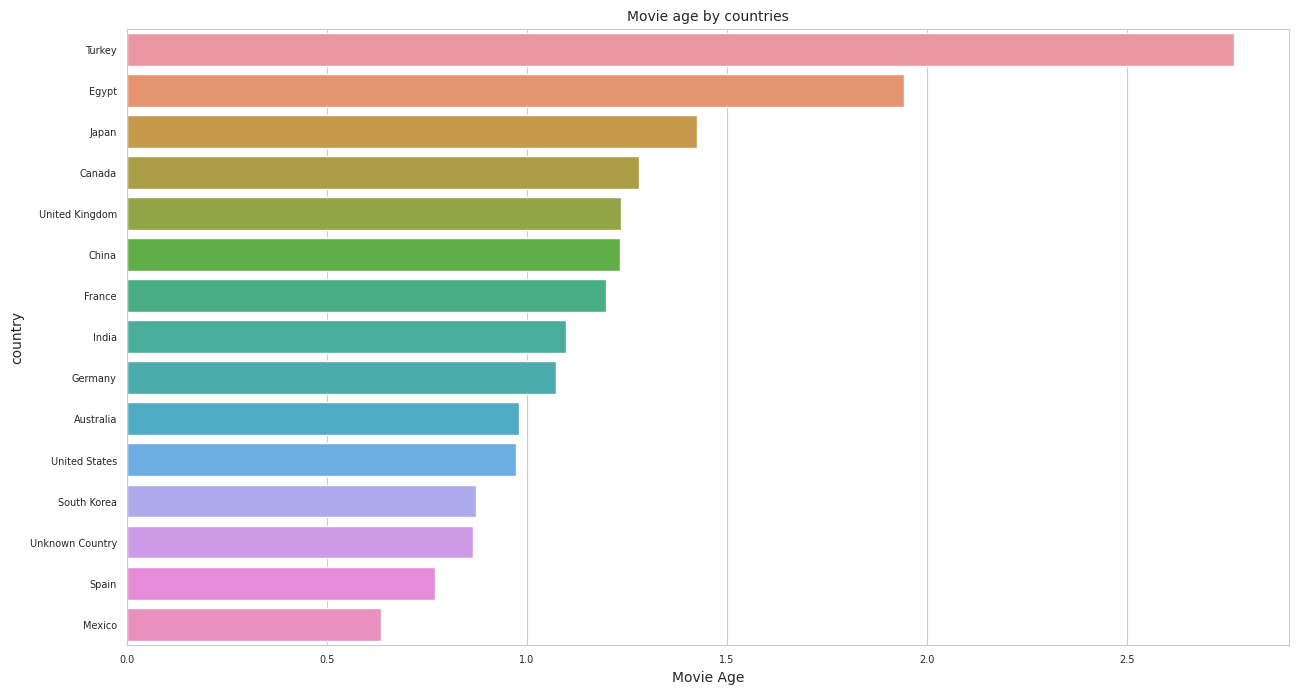

In [ ]:
#Un-nesting of countries('country')

#Extract data-set for 'Top 15' countries
top15_country = df_country[df_country["country"] != 'Country Unknown']["country"].value_counts().index[:15]
top15_data = df_country.loc[ df_country["country"].isin(top15_country)]

# Avergae age of 'Movie' by countries (Consider only content from recent past, released after 2014)
df_movie = top15_data[(top15_data['release_year'] > 2014) & (top15_data['type'] == 'Movie')]
df_movie['age'] = df_movie['year_added'] - df_movie['release_year']
mean_movie_age = df_movie.groupby('country')['age'].mean().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(data=mean_movie_age, x='age', y='country')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.xlabel("Movie Age")
plt.title('Movie age by countries', fontsize=10)
plt.show()

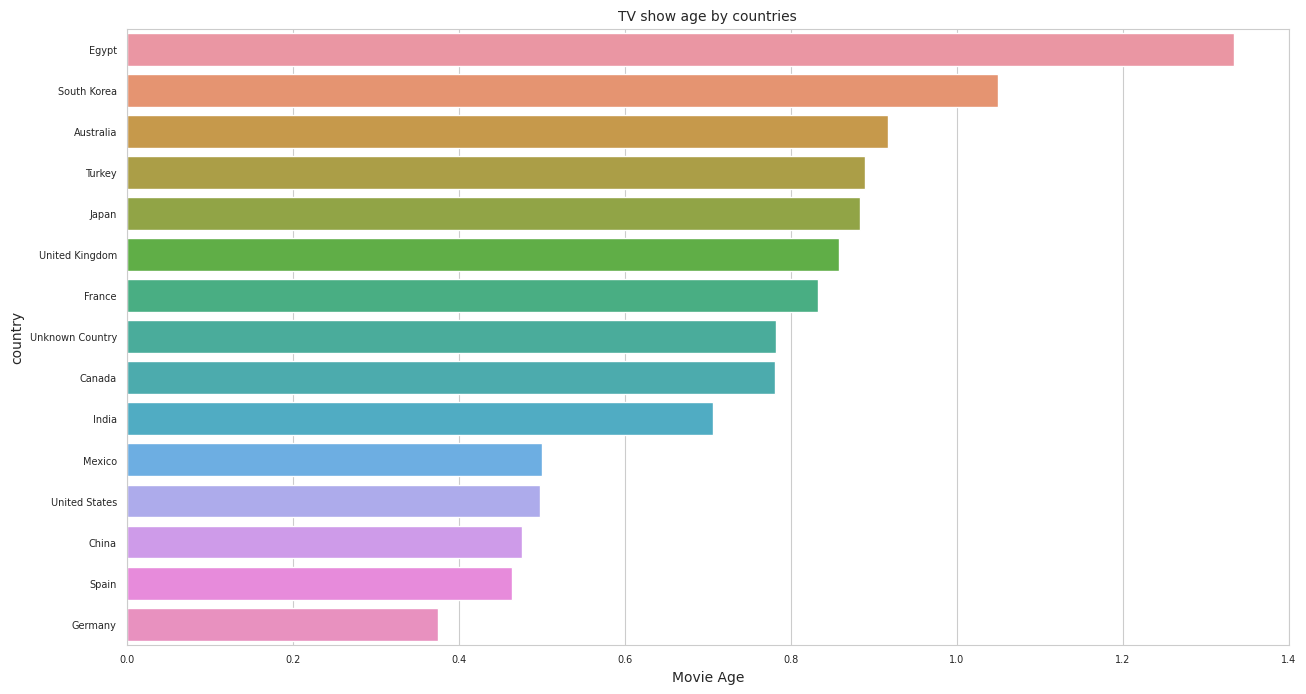

In [ ]:
df_TVShow = top15_data[(top15_data['release_year'] > 2014) & (top15_data['type'] == 'TV Show')]
df_TVShow['age'] = df_TVShow['year_added'] - df_TVShow['release_year']
mean_TVshow_age = df_TVShow.groupby('country')['age'].mean().sort_values(ascending=False).reset_index()
fig = plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(data=mean_TVshow_age, x='age', y='country')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.xlabel("Movie Age")
plt.title('TV show age by countries', fontsize=10)
plt.show()

In [ ]:
df_movie.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year_added,age
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...",France,2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...,"[Dramas, Independent Movies, International Mov...",2018,2
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"[Dramas, International Movies, Music & Musicals]",2019,4


In [ ]:
df_TVShow.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,year_added,age
8797,s8798,TV Show,Zak Storm,Unknown Director,"Michael Johnston, Jessica Gee-George, Christin...",South Korea,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,[Kids' TV],2018,2
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","[Kids' TV, Korean TV Shows, TV Comedies]",2019,1
